In [1]:
#Data Loading
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# loading the crimes data
data = pd.read_csv("Crimes_-_2001_to_present.csv")
# columns in the dataset
print(data.columns)
data.head(3)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4930918,HM544061,08/16/2006 03:55:00 PM,006XX W SHERIDAN RD,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,True,False,...,46.0,6.0,05,1171089.0,1926189.0,2006,02/28/2018 03:56:25 PM,41.952937,-87.646460,"(41.952937476, -87.646459694)"
1,4930924,HM545898,08/17/2006 12:00:00 AM,053XX N CUMBERLAND AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,...,41.0,76.0,26,1119313.0,1934228.0,2006,02/28/2018 03:56:25 PM,41.975978,-87.836624,"(41.975978414, -87.83662354)"
2,4930927,HM545908,08/17/2006 03:00:00 PM,021XX N CANNON DR,0810,THEFT,OVER $500,OTHER,False,False,...,43.0,7.0,06,1175179.0,1914632.0,2006,02/28/2018 03:56:25 PM,41.921134,-87.631772,"(41.92113376, -87.631772431)"


In [2]:
data.shape

(6815771, 22)

In [25]:
#Filtering years from 2007 to 2018
years = [2015,2016,2017,2018]
crimes = data[data.Year.isin(years)]

In [26]:
crimes.groupby('Primary Type').size().sort_values(ascending=False)


Primary Type
THEFT                                248299
BATTERY                              198207
CRIMINAL DAMAGE                      116532
ASSAULT                               75461
DECEPTIVE PRACTICE                    72329
OTHER OFFENSE                         69155
NARCOTICS                             61718
BURGLARY                              52192
ROBBERY                               43162
MOTOR VEHICLE THEFT                   42766
CRIMINAL TRESPASS                     26423
WEAPONS VIOLATION                     16945
OFFENSE INVOLVING CHILDREN             9137
PUBLIC PEACE VIOLATION                 6895
CRIM SEXUAL ASSAULT                    6199
INTERFERENCE WITH PUBLIC OFFICER       4635
SEX OFFENSE                            4090
PROSTITUTION                           3575
HOMICIDE                               2550
ARSON                                  1785
LIQUOR LAW VIOLATION                    976
GAMBLING                                891
KIDNAPPING         

C:\Users\renug\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

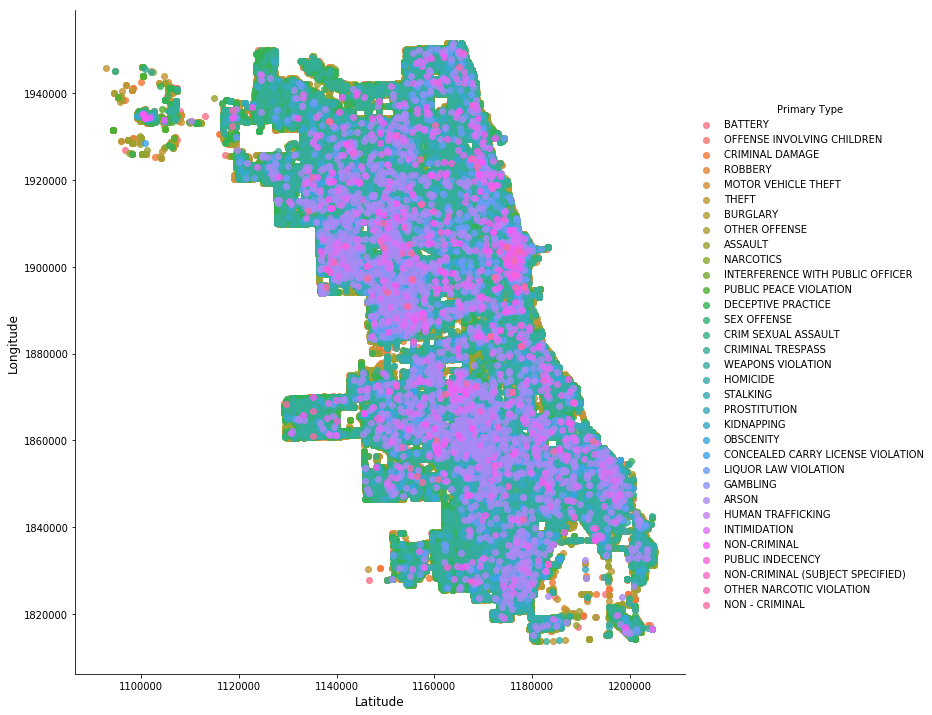

In [27]:
#Can we detect clusters based on Primary Type. In other words do certain offences occur more 
#frequently or exclusively in a certain area ?
plt.figure(figsize=(12,12))
sns.lmplot(x='X Coordinate', y='Y Coordinate', size=10, hue='Primary Type', data=crimes, fit_reg=False)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [28]:
#Getting top k
topk = crimes.groupby(['Community Area', 'Primary Type']).size().reset_index(name='counts').groupby('Community Area').apply(lambda x: x.sort_values('counts',ascending=False).head(3))
print(topk)

                     Community Area        Primary Type  counts
Community Area                                                 
0.0            0                0.0             ASSAULT       1
               1                0.0             BATTERY       1
               2                0.0     CRIMINAL DAMAGE       1
1.0            32               1.0               THEFT    4050
               7                1.0             BATTERY    2869
               10               1.0     CRIMINAL DAMAGE    1903
2.0            61               2.0               THEFT    3142
               36               2.0             BATTERY    2313
               40               2.0     CRIMINAL DAMAGE    1825
3.0            88               3.0               THEFT    3855
               65               3.0             BATTERY    2730
               70               3.0  DECEPTIVE PRACTICE    1472
4.0            117              4.0               THEFT    2205
               92               4.0     

C:\Users\renug\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


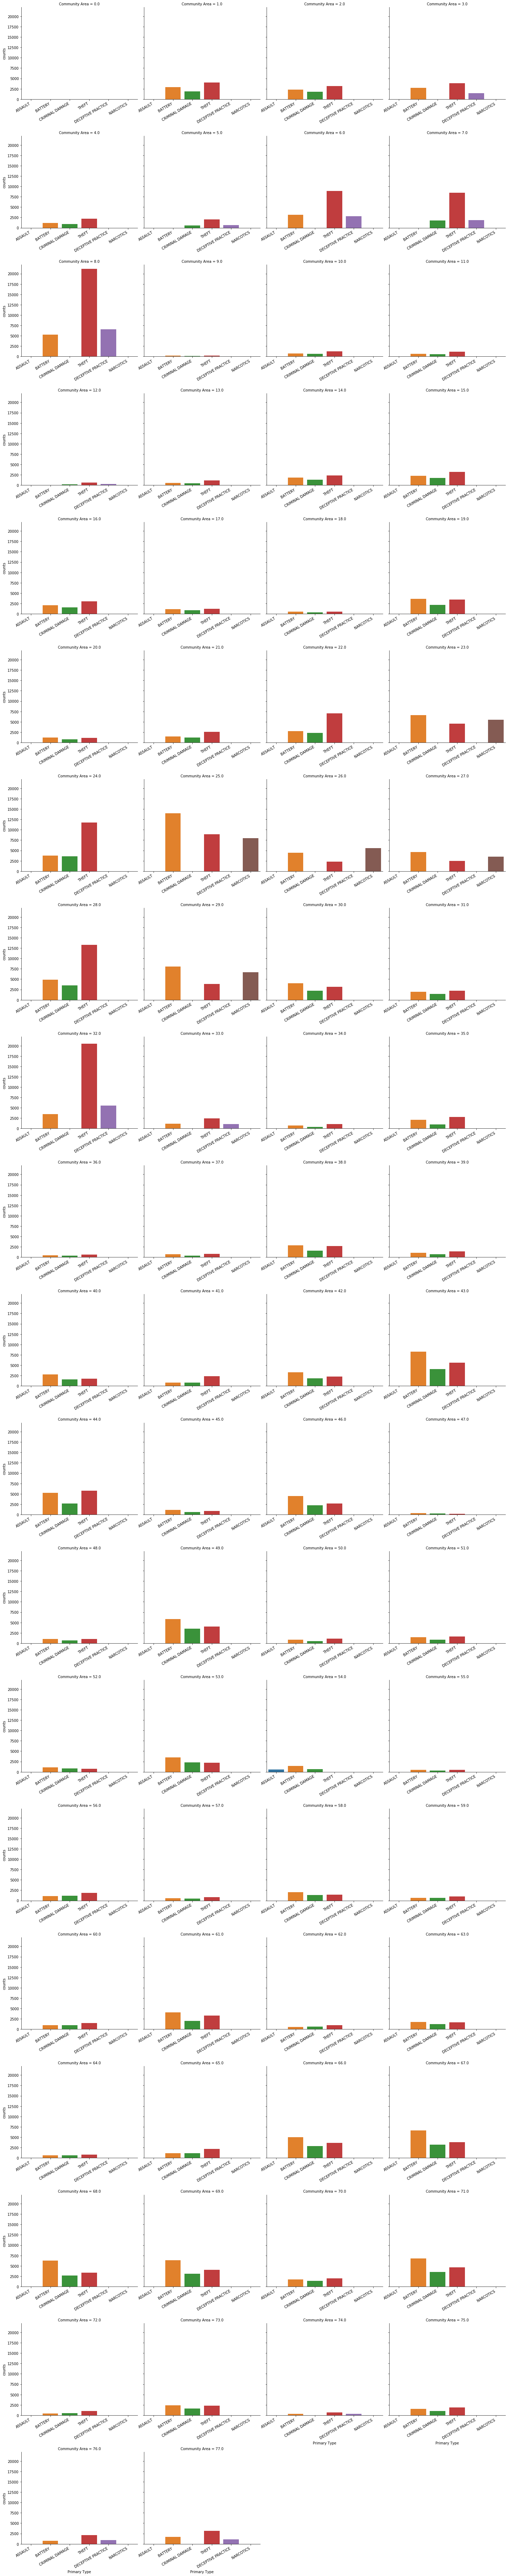

In [29]:
#Plotting top-k per community area
g =sns.factorplot("Primary Type", y='counts', col="Community Area", col_wrap=4,
                   data=topk, kind='bar')
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=30, ha='right')

plt.subplots_adjust(hspace=0.4)

In [31]:
#where does each crime occur more often
topk_loc_descr = crimes.groupby(['Primary Type', 'Location Description']).size().reset_index(name='counts').groupby('Primary Type').apply(lambda x: x.sort_values('counts',ascending=False).head(3))

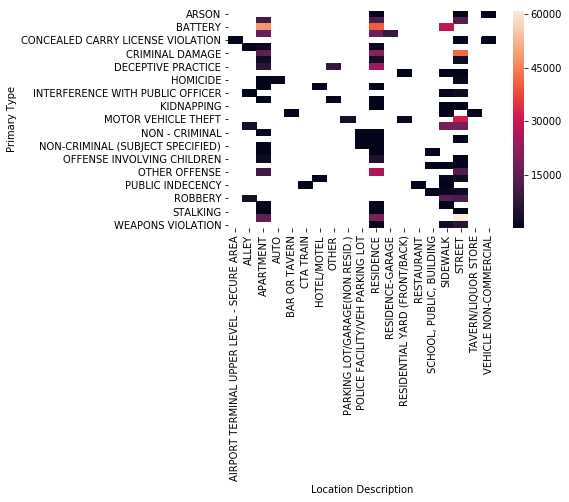

In [32]:
import seaborn as sns
pivotdf = topk_loc_descr.pivot(index='Primary Type', columns='Location Description', values='counts')
sns.heatmap(pivotdf)